# **ETL.ipynb**

## Objectives

* "Fetch data from Kaggle and save as raw data", 
NB I have downloaded the datasets as a zip file, extracted and saved them in Windows Explorer for now, will add this extraction step later if required and I have time.

* Read and summarise, analyse and visualise datasets.

## Inputs

* 
sales data-set.csv
Features data set.csv
stores data-set.csv

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\ifp-retailanalysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\ifp-retailanalysis'

# Section 1

## Import necessary Python libraries, read raw datasets into Pandas dataframes and inspect summary data.

Note I downloaded the csv files as a zip file from Kaggle, unzipped the archive on my downloads folder, renamed the files replacing spaces with underscores, dragged them from my downloads extract folder saved the datasets.  I do not know how to import them directly from the Kaggle website and unzip the archive, either with code here or in the vscode terminal but would seek to learn and do this if possible to ensure no corruption of datasets or if downloading to Windows vs vscode causes any auto reformating of dates from US to UK format.

In [4]:
# import all necessary Python libraries
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline

In [5]:
# reset defaults for readability and filesize reduction following increases below
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [6]:
#read sales, Features and Store datasets into aptly named pandas dataframes and summarise
 
# I attempted to read from zip in case it affects date format but was not possible
# df_sales=pd.read_csv('Dataset/Raw/archive.zip/sales data-set.csv')

df_sales=pd.read_csv('Dataset/Raw/sales_data-set.csv')
print(f'<sales_data-set.csv> read into data frame "df_sales"\n')
print(f'{df_sales}\n')
print(f'{df_sales.info()}\n\n')

df_features=pd.read_csv('Dataset/Raw/Features_data set.csv')
print(f'<Features data_set.csv> read into data frame "df_features"\n')
print(f'{df_features}\n')
print(f'{df_features.info()}\n\n')

df_stores=pd.read_csv('Dataset/Raw/stores_data-set.csv')
print(f'<stores_data-set.csv> read into data frame "df_stores"\n')
print(f'{df_stores}\n')
print(f'{df_stores.info()}\n')

<sales_data-set.csv> read into data frame "df_sales"

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  

My initial observations. 

1. The sales dataset is by far the largest with, for each store and each department within, on dates apparently from 5th Feb 2010 to 26th Oct 2012 (TBC by date formatting and sorting) The dates seen in the head and tail are clearly in UK date format dd/mm/yyyy which surprised me this being a USA dataset.

Start date is in line with the Kaggle data source description 'Historical sales data, which covers to 2010-02-05 to 2012-11-01' but but end date is slightly earlier possibly due to dates not being sorted correctly., weekly sales data and whether each date is a holiday.  

The there is no missing data.

There are no units in the column headings so it's not immediately clear what the weekly_sales represent.  At this stage I will assume these are the total amounts in US dollars as the description of holidays in the Kaggle dataset implies this is a USA business.

2. The Features dataset is considerably smaller being only by store not department.  Like the sales data, it appears to have weekly information starting 5th Feb 2010 but for a longer date range to 26th Jul 2013, and whether each date is a holiday.  
But unlike the sales data, it has additonal data on Markdowns 1-5, temperature, fuel price, CPI and unemployment.

Again, The dates seen in the head and tail are clearly in UK date format dd/mm/yyyy which surprised me this being a USA dataset.

There is a considerable amount of missing data including Markdown data for almost half the rows.

There are no units in the column headings so it's not immediately clear what the numbers in the Markdown columns represent.  At this stage I will assume these are the total amounts in US dollars as with weekly_sales as they seem mostly too large to be percentages.

Regarding dates, as in section 1 I downloaded the dataset as a zip archive from Kaggle, renamed replacing spaces with underscores and dragged the files into the vscode Datasets/Raw folder (all without opening in Excel or any other software).  However I am unsure if downloading and extracting on my UK computer or possibly vscode settings could have still somehow reformatted dates to UK format if they were in US format.  The dates in the sales and features datasets appeared to me of mixed format so converting using the datetime format with the datefirst=True argument is risky so I would need to inspect dates not already in a date format to check.

3. The sales dataset is relatively small just listing the store type (a letter) and size (an integer) for each of the 45 stores.

There is no missing data.

Again no units for size so no idea if this is annual turnover or square footage etc.  I'd guess the former it has a close correlation with sales. 

In order to better understand the datasets from the outset, would normally request information on the units from the generator of the datasets but in this project that is not possible.

---

# Section 2 Initial visualisations and transformations

## Section 2.1 visualise total sales distribution and sales vs size correlation by store type.

In [7]:
#Group total sales by store.
df_stores['totalsales_millions'] = (
    df_sales.groupby('Store')['Weekly_Sales'].sum()/1000000
    )
print(df_stores.sort_values(by='totalsales_millions', ascending=False))

    Store Type    Size  totalsales_millions
20     21    B  140167           301.397792
4       5    B   34875           299.543953
14     15    B  123737           288.999911
13     14    A  200898           286.517704
2       3    B   37392           275.382441
10     11    A  207499           271.617714
27     28    A  206302           253.855917
6       7    B   70713           223.756131
1       2    A  202307           222.402809
39     40    A  155083           207.445542
19     20    A  203742           206.634862
31     32    A  203007           199.613905
23     24    A  203819           198.750618
24     25    B  128107           194.016021
11     12    B  112238           193.962787
28     29    B   93638           189.263681
41     42    C   39690           181.341935
32     33    A   39690           166.819246
18     19    A  203819           155.114734
22     23    B  114533           147.075649
12     13    A  219622           144.287230
26     27    A  204184          

---

In [8]:
#Grouped store type count, mean and total Size and total sales.
#Correlation matrices for sales vs size for each store type.
print(df_stores.drop(columns=['Store']).groupby("Type").agg(['count', 'mean', 'median', 'sum']).round(1))
print()
types= df_stores["Type"].unique()
for t in types:
    print()
    print(f'Correlation matrix for store type {t}:')
    print(df_stores[df_stores["Type"] == t].drop(columns=['Type','Store']).corr())
    

      Size                              totalsales_millions                \
     count      mean    median      sum               count   mean median   
Type                                                                        
A       22  177247.7  202406.0  3899450                  21  150.8  144.3   
B       17  101190.7  114533.0  1720242                  17  170.7  147.1   
C        6   40541.7   39910.0   243250                   6   92.7   78.4   

              
         sum  
Type          
A     3166.6  
B     2902.0  
C      556.2  


Correlation matrix for store type A:
                         Size  totalsales_millions
Size                 1.000000             0.141003
totalsales_millions  0.141003             1.000000

Correlation matrix for store type B:
                         Size  totalsales_millions
Size                 1.000000            -0.273291
totalsales_millions -0.273291             1.000000

Correlation matrix for store type C:
                         S

From the above, there does not appear to be any very significant grouping of sales amongst any particular group of stores which the business should focus on. 

Store type A has the largest store count, mean and total sales, followed by type B with type C being the fewest and smallest.

There is no strong correlation between store size and sales and in fact this is negative for store types B and C which seems counterintuitive indicating other factors more strongly affect sales.

Section 2.12 join sales and Features datasets together.

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

## Section 2.2 Reformat sales and Features dataframe date columns to datetime format and merge datasets

In [9]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='raise', dayfirst='False', format='mixed')
# df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='raise', dayfirst='False')
df_sales = df_sales.sort_values(by=['Date','Store', 'Dept'])
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
143,1,2,2010-02-05,50605.27,False
286,1,3,2010-02-05,13740.12,False
429,1,4,2010-02-05,39954.04,False
572,1,5,2010-02-05,32229.38,False
...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,False
421146,45,94,2012-10-26,5203.31,False
421289,45,95,2012-10-26,56017.47,False
421434,45,97,2012-10-26,6817.48,False


In [10]:
df_features['Date'] = pd.to_datetime(df_features['Date'], errors='raise', dayfirst='False', format='mixed')
df_features = df_features.sort_values(by=['Date'])
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2730,16,2010-02-05,19.79,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.039,False
5460,31,2010-02-05,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
3640,21,2010-02-05,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
4550,26,2010-02-05,9.55,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,8.488,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5823,32,2013-07-26,72.99,3.582,549.89,940.93,86.00,106.47,1530.56,NaN,NaN,False
2365,13,2013-07-26,83.62,3.669,346.31,1377.41,93.40,140.32,2147.06,NaN,NaN,False
5641,31,2013-07-26,85.00,3.620,1394.82,138.71,12.00,970.77,6859.07,NaN,NaN,False
6733,37,2013-07-26,83.28,3.620,178.00,11.86,NaN,NaN,779.32,NaN,NaN,False


In converting the date formats in the sales and features dataframes with the pd.dateformat function, I used the errors='raise', dayfirst=TrueFalse, format='mixed' arguments.  The format='mixed' argument was necessary, without which the code generated errors, presumably due to formatting inconsistencies in the raw data.

According to the pandas documentation for the datetime function currently at
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

the “mixed” argument is 'used to infer the format for each element individually. This is risky, and you should probably use it along with dayfirst.'  I assumed = False as this is a USA dataset so any date strings are likely to state month number before day number.

## Find and inspect dates which were in different formats in raw sales and Features datasets to ensure they converted to correct date when I have time!

In [11]:
#look at markdown ranges to try to understand what they mean  Are these percentages or absolute reductions?
df_features['MarkDown1'].value_counts().sort_index(ascending=True)

MarkDown1
-2781.45      1
-772.21       1
-563.90       1
-16.93        1
 0.27         1
             ..
 84139.36     1
 88646.76     1
 88750.34     1
 95102.50     1
 103184.98    1
Name: count, Length: 4023, dtype: int64

In [12]:
#read and view features file to try to understand what Markdown columns mean
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df_features['Year'] =df_features['Date'].dt.year
df_features['Monthno'] =df_features['Date'].dt.month
df_features['MarkDownOn']=((df_features['MarkDown1'] > 0) | (df_features['MarkDown2'] > 0) | (df_features['MarkDown3'] > 0) | (df_features['MarkDown4'] > 0) | (df_features['MarkDown5'] > 0))
print(df_features.groupby(['Year', 'Monthno', 'MarkDownOn','IsHoliday']).size())


# According to the summary there is data for at least one of the 5 MarkDown columns from Apr 2011 onwards.  
# The Kaggle sourcepage said there was in fact no markdown data until Nov 2011 so 
# could be an indication some dates have not converted correctly.

Year  Monthno  MarkDownOn  IsHoliday
2010  2        False       False        135
                           True          45
      3        False       False        180
      4        False       False        225
      5        False       False        180
      6        False       False        180
      7        False       False        225
      8        False       False        180
      9        False       False        135
                           True          45
      10       False       False        225
      11       False       False        135
                           True          45
      12       False       False        180
                           True          45
2011  1        False       False        180
      2        False       False        135
                           True          45
      3        False       False        180
      4        False       False        225
      5        False       False        180
      6        False       False       

In [13]:
# reset defaults for readability and filesize reduction following increases above
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

# I see there is sales data from Jan 2010 until Dec 2012  
# The Kaggle sourcepage said there was in fact no sales data until Feb 2011 so was worth checking.

# Section 2.3 Merge sales and features datasets

In [14]:
#merge sales and features datasets outer join on Store and Data
# takes about 1min to run try not to run unless necessary
df_salesfeaturesmerged = pd.merge(df_sales, df_features, how='outer', on=['Store', 'Date'])
print(df_salesfeaturesmerged)

        Store  Dept       Date  Weekly_Sales IsHoliday_x  Temperature  \
0           1   1.0 2010-02-05      24924.50       False        42.31   
1           1   2.0 2010-02-05      50605.27       False        42.31   
2           1   3.0 2010-02-05      13740.12       False        42.31   
3           1   4.0 2010-02-05      39954.04       False        42.31   
4           1   5.0 2010-02-05      32229.38       False        42.31   
...       ...   ...        ...           ...         ...          ...   
423320     32   NaN 2013-07-26           NaN         NaN        72.99   
423321     13   NaN 2013-07-26           NaN         NaN        83.62   
423322     31   NaN 2013-07-26           NaN         NaN        85.00   
423323     37   NaN 2013-07-26           NaN         NaN        83.28   
423324     45   NaN 2013-07-26           NaN         NaN        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN      

No Nulls in the sales and stores datasets but in the features dataset, many of the 5 markdown columns have no data, but I'm unclear if this matters for many weeks as this may not be when any markdown would normally occur any way.  To assess this, I need to understand when these markdowns typically occur.

According to the data source.
https://www.kaggle.com/datasets/manjeetsingh/retaildataset

'The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.'

So the main 4 holiday periods are Super Bowl, Labor Day, Thanksgiving and Christmas

According to Wikipedia
https://en.wikipedia.org/wiki/Super_Bowl

'Since 2022, the game has been played on the second Sunday in February. Prior Super Bowls were played on Sundays in early to mid-January from 1967 to 1978, late January from 1979 to 2003,[a] and the first Sunday of February from 2004 to 2021.'

So would have been 1st Sun in Feb in all time periods above.

According to Wikipedia
https://en.wikipedia.org/wiki/Labor_Day

'Labor Day is a federal holiday in the United States celebrated on the first Monday of September'

According to a CoPilot search asking 
'When is thanksgiving celebrated in the USA?'
https://www.bing.com/search?q=When%20is%20thanksgiving%20celebrated%20in%20the%20USA%3F&qs=n&form=QBRE&sp=-1&ghc=1&lq=0&pq=when%20is%20thanksgiving%20celebrated%20in%20the%20usa%3F&sc=19-43&sk=&cvid=A45308B981654BBCB1DA8924DA4332B2

In [15]:
print((df_salesfeaturesmerged[['Year','Monthno','Weekly_Sales',
'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(['Year', 'Monthno']).count())
)

              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Year Monthno                                                             
2010 2               11839          0          0          0          0   
     3               11788          0          0          0          0   
     4               14697          0          0          0          0   
     5               11672          0          0          0          0   
     6               11661          0          0          0          0   
     7               14561          0          0          0          0   
     8               11603          0          0          0          0   
     9               11724          0          0          0          0   
     10              14667          0          0          0          0   
     11              11712          0          0          0          0   
     12              14755          0          0          0          0   
2011 1               11695          0 

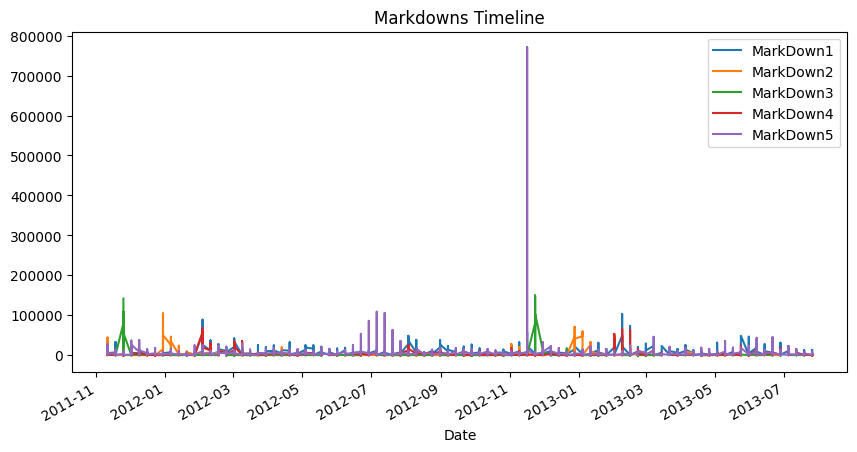

In [16]:
#timeline Markdowns line plot
df_features.plot(kind='line', x='Date', y=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], figsize=(10, 5), title='Markdowns Timeline')
plt.show()
# .plot(kind='line',x='year',y='AvgLevels', figsize=(5,5))

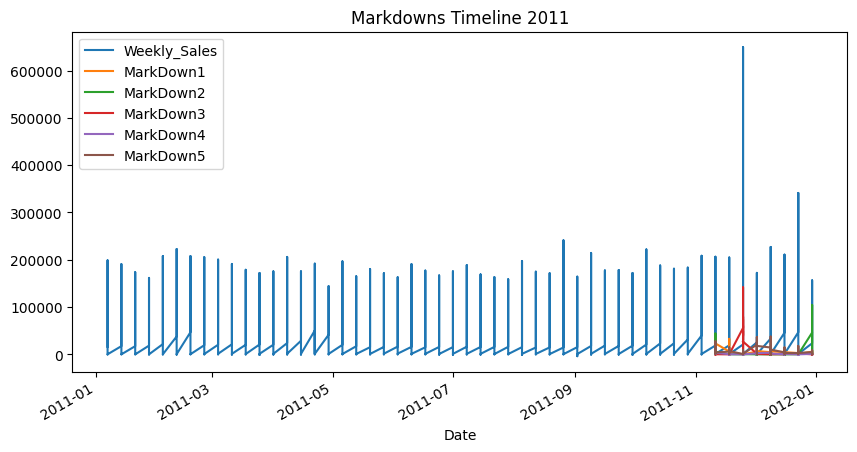

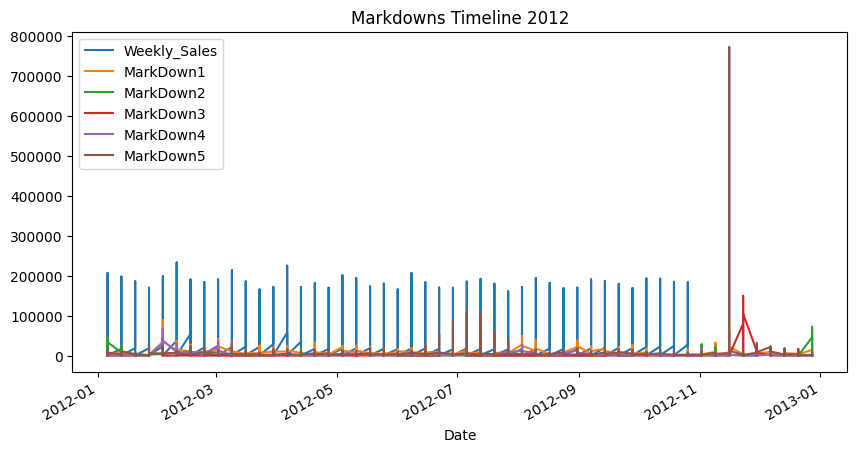

In [17]:
#salesfeaturemerged Markdowns and sales timeline plot from 2011 and 2012 
# the only years where sales and markdown datasets overlap
for y in [2011, 2012]:
    df_salesfeaturesmerged.query('Year==@y').plot(kind='line', x='Date', y=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], figsize=(10, 5), title=f'Markdowns Timeline {y}')
    plt.show()

In [18]:
#My internet is down phone and ask Vasi if working locally is a good alrernative.  His tel number is

In [19]:
print(df_salesfeaturesmerged[['Year','Monthno','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].groupby(['Year', 'Monthno']).count())

# I see there is sales data from Jan 2010 until Dec 2012  
# The Kaggle sourcepage said there was in fact no sales data until Feb 2011 so was worth checking.

              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Year Monthno                                                             
2010 2               11839          0          0          0          0   
     3               11788          0          0          0          0   
     4               14697          0          0          0          0   
     5               11672          0          0          0          0   
     6               11661          0          0          0          0   
     7               14561          0          0          0          0   
     8               11603          0          0          0          0   
     9               11724          0          0          0          0   
     10              14667          0          0          0          0   
     11              11712          0          0          0          0   
     12              14755          0          0          0          0   
2011 1               11695          0 

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [20]:
#I don't understand what's going on in the template code below 
# which generates errors with each run, so commented out for now.

# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
